In [2]:
import config
import dr_methods as drm
import niftiutils.helper_fxns as hf
import niftiutils.masks as masks
import niftiutils.visualization as vis
import importlib
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from os.path import *
import pandas as pd
import shutil
import re
import random
import seg_methods as sm
import time
import voi_methods as vm
import operator
%matplotlib inline

C:\Users\Clinton\AppData\Local\conda\conda\envs\old-keras\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Clinton\AppData\Local\conda\conda\envs\old-keras\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [3]:
C = config.Config()

In [63]:
xls_path = r"Z:\Paula\Clinical data project\coordinates + clinical variables.xlsx"

In [46]:
importlib.reload(vm)
vm.save_segs_as_imgs()

In [57]:
importlib.reload(vm)
vm.remove_lesion_id("5276207")

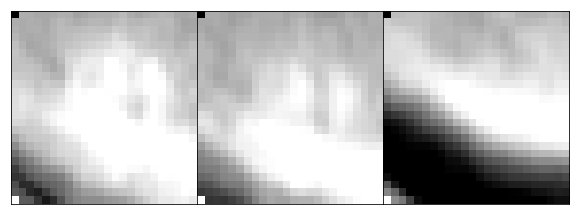

In [59]:
importlib.reload(vm)
vm.plot_check(1,"4262153_1");

In [62]:
importlib.reload(vm)
vm.save_seg_set(unaug=False, num_cores=2, overwrite=False)

In [1]:
psa_xls = r"Z:\PSA_Sophie_Isa\PSA_Sophie_Isa_Spreadsheet.xlsx"

In [55]:
modality = "Y90"
df = pd.read_excel(psa_xls, sheetname=modality, header=1)
Y = [str(int(mrn.strip()[-7:])) for mrn in df["MRN"].values if mrn.startswith("JH")]

In [33]:
os.makedirs("F:\\JHU HCCs\\"+modality+"\\00_OriginalData")

In [49]:
for fn in glob.glob("F:\\JHU HCCs\\00_OriginalData\\*"):
    if basename(fn)[:6] in A:
        os.rename(fn, join("F:\\JHU HCCs\\"+modality+"\\00_OriginalData", basename(fn)))

In [ ]:
df[df["Imaging available"]=="No"]

In [ ]:
for fn in os.listdir(r"F:\JHU HCCs\Other\pre_tace_root"):
    print(fn[:7].strip())

In [62]:
for fn in glob.glob("H:\\Missing Imaging\\*"):
    if basename(fn)[:7] in D:
        shutil.move(fn, join("F:\\JHU HCCs\\DEB-TACE\\00_OriginalData", basename(fn)))

In [2]:
base_dir = "D:\\Etiology\\Imaging"

In [3]:
C = config.Config()

In [ ]:
sm.save_segs()

In [ ]:
importlib.reload(drm)
accnum_xls_path = r"C:\Users\Clinton\Box\Rad-Etiology Correlation\hklc_master.xlsx"
drm.build_coords_df(accnum_xls_path)

In [8]:
S = [fn for fn in glob.glob(join(C.full_img_dir, "*.npy")) if fn.endswith("seg.npy")]

In [14]:
for fn in S:
    #print(join(dirname(fn), basename(fn)[:-7]+"tumorseg.npy"))
    os.rename(fn, join(dirname(fn), basename(fn)[:-7]+"tumorseg.npy"))

In [17]:
for fn in glob.glob(r"D:\Etiology\Imaging\*\*20s*"):
    lesion_id = basename(dirname(fn))
    lesion_id = lesion_id[:lesion_id.find(' ')]
    targ_dir = join(r"D:\Etiology\Imaging-Ordered", lesion_id, "20s")
    if not exists(targ_dir):
        shutil.copytree(fn, targ_dir)

In [ ]:
lesions = []
for fn in glob.glob(join(base_dir, "*", "Segs")):
    les_dir = dirname(fn)
    if exists(join(les_dir, "20s")) and exists(join(les_dir, "70s")) and exists(join(les_dir, "3min")):
        lesions.append(basename(les_dir))

In [ ]:
pd.DataFrame(lesions).to_excel("D:\\test.xlsx", index=False)

In [ ]:
for fn in glob.glob(join(base_dir, "*", "Segs", "liver", "*liver*.ids")):
    os.rename(fn, join(dirname(dirname(fn)), "liver.off"))

In [ ]:
for fn in glob.glob(join(base_dir, "*", "Segs", "tumor_20s.ids")):
    lesion_id = fn[len(base_dir)+1 : fn.find("\\", len(base_dir)+1)]
    nii_path = join(dirname(dirname(fn)), "nii_dir", "20s.nii.gz")
    npy_path = join(C.full_img_dir, lesion_id+"_tumorseg.npy")
    if exists(nii_path):# and not exists(npy_path):
        print(".",end="")
        M = masks.get_mask(fn, img_path=nii_path)
        np.save(npy_path, M)

In [6]:
for fn in glob.glob(r"F:\PK CBCT\*\masks\reg"):
    shutil.rmtree(fn)

In [37]:
os.listdir(r"D:\Etiology\Imaging").index(accnum)

642

In [32]:
importlib.reload(sm)
for accnum in os.listdir(r"D:\Etiology\Imaging"):
    if not exists(join(r"D:\Etiology\Imaging", accnum, "Segs\\tumor_20s.off")):
        continue
    masks.off2ids(join(r"D:\Etiology\Imaging", accnum, "Segs\\tumor_20s.off"))
    sm.save_segs([accnum])

In [20]:
len(glob.glob(r"D:\Etiology\OrigData\*\Pre_Ax_Gad*"))

182

In [ ]:
for fn in glob.glob(r"D:\Etiology\Imaging\*\T1_20s"):
    if not exists(join(dirname(fn), "T1_pre")) and not exists(join(dirname(fn), "T1_multiphase")):
        print(fn)

In [ ]:
len(glob.glob(r"D:\Etiology\Imaging\*\T1_pre"))

In [78]:
for fn in glob.glob(r"D:\Etiology\Imaging\*"):
    lesion_id = basename(fn)
    target_dir = join("F:\\HCCs", lesion_id)
    if not exists(target_dir):
        shutil.copytree(fn, target_dir)

In [77]:
for fn in glob.glob(r"D:\Etiology\OrigData\*\*XV_MultiPhase_*0"):
    lesion_id = basename(dirname(fn))[:7]
    if re.match("\\d",lesion_id[-1]) is None:
        lesion_id = lesion_id[:-1]
    target_dir = join(base_dir, lesion_id, "T1_pre")
    if not exists(target_dir):
        shutil.copytree(fn, target_dir)

In [ ]:
drm.dcm2npy(overwrite=True)

In [61]:
importlib.reload(drm)
drm.dcm2npy(accnums=['5399031'], overwrite=True)

In [ ]:
for fn in glob.glob(join(base_dir, "*", "Segs", "liver.off")):
    if not exists(join(dirname(fn), "liver.ids")):
        print(".",end="")
        masks.off2ids(fn, num_tumors=1, R=[3,3,5], minVol=10)

In [28]:
for ext in [".off", ".ids", ".ics"]:
    for fn in glob.glob(join(base_dir, "*", "Segs", "*liver*"+ext)):
        new_name = join(dirname(fn), "liver"+ext)
        if not exists(new_name):
            os.rename(fn, new_name)
        #lesion_id = fn[len(base_dir)+1 : fn.find("\\", len(base_dir)+1)]

In [95]:
A = [basename(fn) for fn in glob.glob(r"D:\Etiology\Imaging\*\Segs\*.off")]
#list(A)[:50]
A = set([a[a.find('_')+1:] for a in A])
A = set([a[a.find(' ')+1:] for a in A])

In [17]:
for fn in glob.glob("D:\\Etiology\\Imaging-Ordered\\*\\*\\.wbvTemp.out"):
    try:
        os.remove(fn)
    except Exception as e:
        hf.handleRemoveReadonly(os.remove, fn, e)

In [55]:
len([f for f in glob.glob("D:\\Etiology\\Imaging-Ordered\\*\\"+ph)])

548

In [3]:
[f for f in glob.glob("D:\\Etiology\\Imaging-Ordered\\*\\"+ph)].index(fn)

483

In [4]:
ph = "20s"
for fn in glob.glob("D:\\Etiology\\Imaging-Ordered\\*\\"+ph)[484:]:
    lesion_id = basename(dirname(fn))
    nii_dir = join(dirname(fn), "nii_dir")
    targ_dir = join(nii_dir, ph+".nii.gz")
    if not exists(targ_dir):
        if not exists(nii_dir):
            os.makedirs(nii_dir)
        I,D = hf.dcm_load(fn, True, True)
        hf.save_nii(I, targ_dir, D)

In [7]:
lesions = [basename(dirname(dirname(fn))) for fn in glob.glob("D:\\Etiology\\Imaging\\*\\nii_dir\\20s.nii.gz")]

In [18]:
img_dir = "D:\\Etiology\\Imaging\\*\\"
for fn in glob.glob(img_dir+"*70s*") + glob.glob(img_dir+"*Venous*") + glob.glob(img_dir+"Ph2*") + glob.glob(img_dir+"*70_s*"):
    lesion_id = basename(dirname(fn))
    lesion_id = lesion_id[:lesion_id.find(' ')]
    targ_dir = join(r"D:\Etiology\Imaging-Ordered", lesion_id, "70s")
    if not exists(targ_dir):
        shutil.copytree(fn, targ_dir)

In [19]:
img_dir = "D:\\Etiology\\Imaging\\*\\"
for fn in glob.glob(img_dir+"*3min*") + glob.glob(img_dir+"*Delay*") + glob.glob(img_dir+"*Equ*") + glob.glob(img_dir+"Ph3*") + glob.glob(img_dir+"*3_min*"):
    lesion_id = basename(dirname(fn))
    lesion_id = lesion_id[:lesion_id.find(' ')]
    targ_dir = join(r"D:\Etiology\Imaging-Ordered", lesion_id, "3min")
    if not exists(targ_dir):
        shutil.copytree(fn, targ_dir)

img_dir = "D:\\Etiology\\Imaging\\*\\"
for fn in glob.glob(img_dir+"*20s*") + glob.glob(img_dir+"*Arter*") + glob.glob(img_dir+"Ph1*") + glob.glob(img_dir+"*20_s*"):
    lesion_id = basename(dirname(fn))
    lesion_id = lesion_id[:lesion_id.find(' ')]
    targ_dir = join(r"D:\Etiology\Imaging-Ordered", lesion_id, "70s")
    if not exists(targ_dir):
        shutil.copytree(fn, targ_dir)

In [69]:
import random

In [79]:
[slice(None, None, (-1)**(random.random() < .5)) for _ in range(3)]

[slice(None, None, 1), slice(None, None, 1), slice(None, None, 1)]

In [7]:
for fn in glob.glob(r"D:\Etiology\Imaging\*"):
    DCE = [x for x in os.listdir(join(fn, mod)) if ("vibe" in x or "post" in x) and x.endswith('.gz')]
    if len(DCE) > 0 and not exists(join(fn, mod, "mr30_equ.nii.gz")):
        DCE = sort_by_series_num([x for x in DCE if "min" not in x])

        print(fn, DCE[-1], DCE[0], sep="\n") #sort_by_series_num(PRE)[-1], 
        correct = input()
        if correct == "0":
            #os.rename(join(accnum, PRE[0]), join(accnum, "T1_BL"))
            os.rename(join(fn, mod, DCE[-1]), join(fn, mod, "mr30_equ.nii.gz"))
        elif correct == "q":
            break
        else:
            continue

In [12]:
for fn in glob.glob(r"Z:\Sophie\CBCTs\*"):
    lesion_id = basename(fn)
    cbct_dir = join(r"D:\Lipiodol\Data", lesion_id, "CBCT")
    shutil.move(fn, cbct_dir)